![](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b8/Logo_uptc_oficial.png/250px-Logo_uptc_oficial.png)

# PROBLEM STATEMENT

You own an ice cream business and you would like to create a model that could predict the daily revenue in dollars based on the outside air temperature (C). You decide that a Linear Regression model might be a good candidate to solve this problem.  
Data set:
- Independant variable X: Outside Air Temperature
- Dependant variable Y: Overall daily revenue generated in dollars 

![](https://3.bp.blogspot.com/-iVLnKWAbq1s/TazV93f8_XI/AAAAAAAAAag/UQU3lRNoDrE/s1600/bon-ice1.jpg)

# STEP #1: LIBRARIES IMPORT


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# STEP #2: IMPORT DATASET

In [2]:
IceCream = pd.read_csv("IceCreamData.csv")

### Let's take a look:

Above is a summary of our data contained in a `Pandas` `DataFrame`. Think of a `DataFrame` as a Python's super charged version of the workflow in an Excel table. As you can see the summary holds quite a bit of information. First, it lets us know we have 500 observations
    
    Int64Index: 500 entries, 0 to 500

Next it shows us all of the columns in `DataFrame`. Each column tells us something about each of our observations, like their `Renevue`, `Temperature`. These colunms  are called a features of our dataset. You can think of the meaning of the words column and feature as interchangeable for this notebook. 


In [3]:
IceCream.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


This function returns the first n rows for the object based on position. It is useful for quickly testing if your object has the right type of data in it.

In [4]:
IceCream.tail()

,Temperature,Revenue
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


This function returns last n rows from the object based on position. It is useful for quickly verifying data, for example, after sorting or appending rows.

In [5]:
IceCream.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


Generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

In [6]:
IceCream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
Temperature    500 non-null float64
Revenue        500 non-null float64
dtypes: float64(2)
memory usage: 7.9 KB


This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

# STEP#3: VISUALIZE DATASET

Here, we are going to plot the dataset and try to fit a line into their features, in this way we can confirm a linear relation and according that we can choose the best model, in this case Linear regression

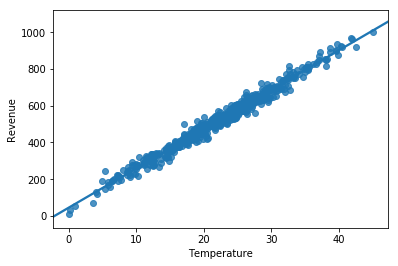

In [7]:
sns.regplot(x='Temperature', y='Revenue', data = IceCream)

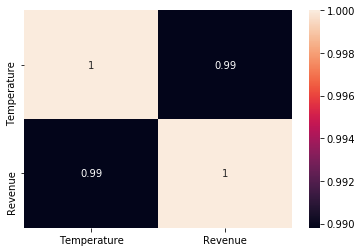

In [8]:
sns.heatmap(IceCream.corr(),annot=True)

We use a heat map to check visually the p-correlation between the dependent variable and independent variable, we can confirm that relation is clearly  strongly lineal

# STEP#4: CREATE TESTING AND TRAINING DATASET

Assign Renvenue feature as dependdent variable or Y

In [9]:
y = IceCream['Revenue']

Assign Temperature feature as independent variable (X)

In [10]:
X = IceCream[['Temperature']]

importing sklear.model_selection libraries


In [11]:
from sklearn.model_selection import train_test_split

Split arrays or matrices into random train and test subsets

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

<ul> 
    <li> <b> X_train :</b> features to train your model </li>
 <li><b>X_test: </b>   features to test your model, this features the model have never seen before </li>
 <li> <b>Y_train:</b>  Output variable to train your model </li>
 <li><b>Y_test: </b>  Outpout varible to test your model </li>
    
</ul>

<b> In the most of the cases the relation between train and test data is 3/4 and 1/4 </b>

# STEP#5: TRAIN THE MODEL

Dimmension of X_train Array

In [13]:
X_train.shape

(375, 1)

import LinearRegression from sklearn library

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
regressor = LinearRegression(fit_intercept =True)

In [16]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
print('Linear Model Coefficient (m): ', regressor.coef_)
print('Linear Model Coefficient (b): ', regressor.intercept_)

Linear Model Coefficient (m):  [21.5567726]
Linear Model Coefficient (b):  41.73318622342464


$$
Yhat = a + b  X
$$

$$
Yhat = 41.733186 + 21.5567726  X
$$

# STEP#6: TEST THE MODEL 

In [18]:
y_predict = regressor.predict(X_test)


0.9802503841678503

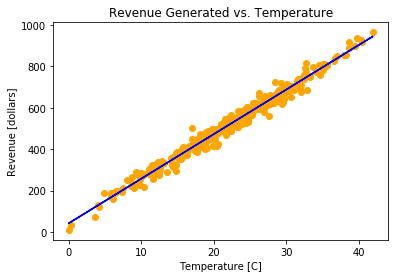

In [19]:
plt.scatter(X_train, y_train, color = 'orange')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [C]')
plt.title('Revenue Generated vs. Temperature')
regressor.score(X_train,y_train)

After trainning our data we can see that the model fits very well with an accuracy of <b>98.1% </b>, this result is according <b> XTrain</b> and <b>YTrain data</b>

Text(0.5, 1.0, 'Revenue Generated vs. Hours (Test dataset)')

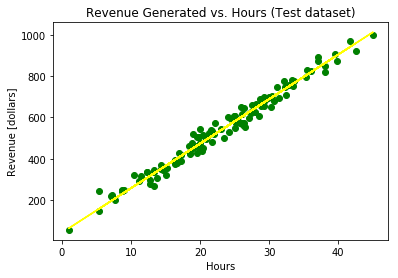

In [20]:
# VISUALIZE TEST SET RESULTS
plt.scatter(X_test, y_test, color = 'green')
y_result = regressor.predict(X_test)
plt.plot(X_test, y_result, color = 'yellow')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Hours')
plt.title('Revenue Generated vs. Hours (Test dataset)')

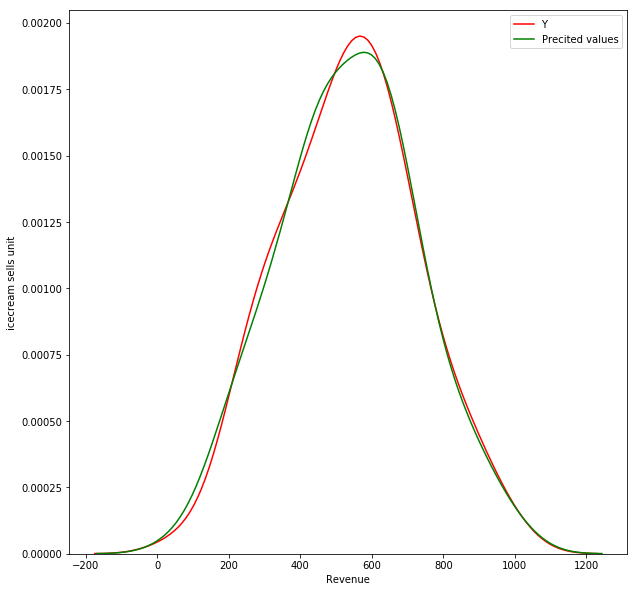

In [21]:
plt.figure(figsize=(10,10))
plt.ylabel("icecream sells unit")
sns.distplot(y_test,hist=False,color='r',label="Y")
sns.distplot(y_result,hist=False,label='Precited values',color='g')

# STEP#7: VALIDATE THE MODEL

In [22]:
regressor.predict([[20.5]])

array([483.64702445])

In [23]:
regressor.score(X,y)

0.9796688706964682

After test our data we can see that the model fits very well with an accuracy of <b>97.9% </b>, lets try with new data!


## QUESTION

<ul>
    <li>How to predict multiples values inside an array? <b>Hint:</b> Check np.array, np.reshape documentation</li>
    <li> Predict the following values: [33.5 ,25.8 ,20.75 ,37.5 ,9.1] and put into array  the answer and make a scatter plot with input and output values
</ul>

### X values

,0
0,33.50
1,25.80
2,20.75
3,37.50
4,9.10


### Y values:

array([763.88506821, 597.89791921, 489.0362176 , 850.11215859,
       237.89981685])

### Graph

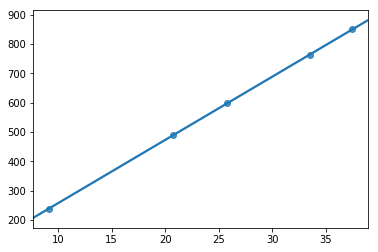